# Application of Machine Learning on Employee Profiling Analysis
## Problem Background
Employees in a company can be diverse in background and interest.Knowing employees helps the management team to understand their needs and expectations from the organization. This helps to adjust management strategies according to the needs and interest. 

Good management strategies motivate employees to spare no effort in executing daily tasks and be postitive. Most importantly , it helps to retain talents in the organization.Otherwise,improper management strategies can lead to dissapointments and lose of employee. 

Therefore,understanding employees in a organization is crucial but yet a challenging task.

Machine Learning is defined by Mitchell (1997) as the study of computer algorithms that improve automatically through experience. [3] Machine learning comes to our sight in the recent decades with its ease and high performance. It has the capacity to learn and identify patterns from data and make decision.[4]

In this paper, we will make use of machine learning techniques to assist us in clustering the employee so that we can better understand them.
## Problem Statement
How can we make us of machine learning to cluster the employees in a organisation?

## Install Dependencies

In [1]:
!pip install  scikit-plot numpy gower matplotlib xlrd pandas seaborn scikit-learn==1.0.2 phik statsmodels pyampute  missingno mlxtend --user 

In [2]:
!pip install -e git+https://github.com/jundongl/scikit-feature.git#egg=skfeature

Obtaining skfeature from git+https://github.com/jundongl/scikit-feature.git#egg=skfeature
  Updating ./src/skfeature clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 48cffad4e88ff4b9d2f1c7baffb314d1b3303792
  Attempting uninstall: skfeature
    Found existing installation: skfeature 1.0.0
    Uninstalling skfeature-1.0.0:
      Successfully uninstalled skfeature-1.0.0
  Running setup.py develop for skfeature


## Import Dependencies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

# Statistical Analysis
import phik
from scipy import stats
import matplotlib.ticker as ticker
from scipy.stats import norm

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import  MinMaxScaler,RobustScaler


# Pipelines
from sklearn.pipeline import Pipeline

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering ,DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn_extra.cluster import KMedoids
## Evaluation
import scikitplot as skplt
from scipy.cluster.hierarchy import dendrogram

from sklearn.metrics import davies_bouldin_score,silhouette_score, silhouette_samples

# Hyperparameter Tuning
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import make_scorer
sns.set()

# Random State
random_state = 0


## Data Ingestion

In [4]:
emDf=pd.read_csv('Company_Employee.csv')
emDf

Age  Gender     BusinessTravel            Job Function  \
0      41  Female      Travel_Rarely                   Sales   
1      49    Male  Travel_Frequently  Research & Development   
2      37    Male      Travel_Rarely  Research & Development   
3      33  Female  Travel_Frequently  Research & Development   
4      27    Male      Travel_Rarely  Research & Development   
...   ...     ...                ...                     ...   
1465   36    Male  Travel_Frequently  Research & Development   
1466   39    Male      Travel_Rarely  Research & Development   
1467   27    Male      Travel_Rarely  Research & Development   
1468   49    Male  Travel_Frequently                   Sales   
1469   34    Male      Travel_Rarely  Research & Development   

      Distance Between Company and Home (KM)  \
0                                          1   
1                                          8   
2                                          2   
3                                          3   
4                                          2   
...                                      ...   
1465                                      23   
1466                                       6   
1467                                       4   
1468                                       2   
1469                                       8   

      Education (1 is lowest, 5 is highest)  \
0                                         2   
1                                         1   
2                                         2   
3                                         4   
4                                         1   
...                                     ...   
1465                                      2   
1466                                      1   
1467                                      3   
1468                                      3   
1469                                      3   

      Job Satisfaction (1 is lowest, 4 is highest) MaritalStatus  Salary ($)  \
0                                                4        Single        5993   
1                                                2       Married        5130   
2                                                3        Single        2090   
3                                                3       Married        2909   
4                                                2       Married        3468   
...                                            ...           ...         ...   
1465                                             4       Married        2571   
1466                                             1       Married        9991   
1467                                             2       Married        6142   
1468                                             2       Married        5390   
1469                                             3       Married        4404   

      Performance Rating (1 is lowest, 4 is highest)  \
0                                                  3   
1                                                  4   
2                                                  3   
3                                                  3   
4                                                  3   
...                                              ...   
1465                                               3   
1466                                               3   
1467                                               4   
1468                                               3   
1469                                               3   

      Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
0                                             1                          6   
1                                             3                         10   
2                                             3                          0   
3                                             3                          8   
4                                             3                        

## Data Exploration

### Data Structure

In [5]:
emDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             1470 non-null   int64 
 1   Gender                                          1470 non-null   object
 2   BusinessTravel                                  1470 non-null   object
 3   Job Function                                    1470 non-null   object
 4   Distance Between Company and Home (KM)          1470 non-null   int64 
 5   Education (1 is lowest, 5 is highest)           1470 non-null   int64 
 6   Job Satisfaction (1 is lowest, 4 is highest)    1470 non-null   int64 
 7   MaritalStatus                                   1470 non-null   object
 8   Salary ($)                                      1470 non-null   int64 
 9   Performance Rating (1 is lowest, 4 is highest)  1470

The dataset consist of 13 features.There are 1470 entries in the dataset. By viewing the basic information of the data structure,we observed that

    - There seems to be no missing data 
    - The data structure for the attributes seems to be correct

### Missing data
At first check ,there is no missing data

In [6]:
pd.DataFrame(emDf.isna().sum().sort_values(ascending=False))

0
Age                                             0
Gender                                          0
BusinessTravel                                  0
Job Function                                    0
Distance Between Company and Home (KM)          0
Education (1 is lowest, 5 is highest)           0
Job Satisfaction (1 is lowest, 4 is highest)    0
MaritalStatus                                   0
Salary ($)                                      0
Performance Rating (1 is lowest, 4 is highest)  0
Work Life Balance (1 is worst, 4 is best)       0
Length of Service (Years)                       0
Resign Status                                   0

<AxesSubplot:title={'center':'Number of missing values in features'}>

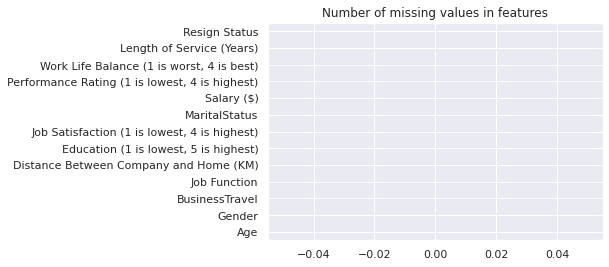

In [7]:
emDf.isna().sum().sort_values().plot.barh(title='Number of missing values in features')

### Quantitative Variables


In [8]:
quantitativeVariables=['Age','Distance Between Company and Home (KM)','Education (1 is lowest, 5 is highest)','Job Satisfaction (1 is lowest, 4 is highest)','Salary ($)','Performance Rating (1 is lowest, 4 is highest)','Work Life Balance (1 is worst, 4 is best)','Length of Service (Years)']

### Qualitative Variables


In [9]:
qualitativeVariables=['Gender', 'BusinessTravel','Job Function','Resign Status','MaritalStatus']

### Univariate Analysis

In [10]:
emDf[quantitativeVariables].describe()

Age  Distance Between Company and Home (KM)  \
count  1470.000000                             1470.000000   
mean     36.923810                                9.192517   
std       9.135373                                8.106864   
min      18.000000                                1.000000   
25%      30.000000                                2.000000   
50%      36.000000                                7.000000   
75%      43.000000                               14.000000   
max      60.000000                               29.000000   

       Education (1 is lowest, 5 is highest)  \
count                            1470.000000   
mean                                2.912925   
std                                 1.024165   
min                                 1.000000   
25%                                 2.000000   
50%                                 3.000000   
75%                                 4.000000   
max                                 5.000000   

       Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
count                                   1470.000000   1470.000000   
mean                                       2.728571   6502.931293   
std                                        1.102846   4707.956783   
min                                        1.000000   1009.000000   
25%                                        2.000000   2911.000000   
50%                                        3.000000   4919.000000   
75%                                        4.000000   8379.000000   
max                                        4.000000  19999.000000   

       Performance Rating (1 is lowest, 4 is highest)  \
count                                     1470.000000   
mean                                         3.153741   
std                                          0.360824   
min                                          3.000000   
25%                                          3.000000   
50%                                          3.000000   
75%                                          3.000000   
max                                          4.000000   

       Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  
count                                1470.000000                1470.000000  
mean                                    2.761224                   7.008163  
std                                     0.706476                   6.126525  
min                                     1.000000                   0.000000  
25%                                     2.000000                   3.000000  
50%                                     3.000000                   5.000000  
75%                                     3.000000                   9.000000  
max                                     4.000000                  40.000000

In [11]:
emDf[qualitativeVariables].describe()

Gender BusinessTravel            Job Function Resign Status  \
count    1470           1470                    1470          1470   
unique      2              3                       3             2   
top      Male  Travel_Rarely  Research & Development            No   
freq      882           1043                     961          1233   

       MaritalStatus  
count           1470  
unique             3  
top          Married  
freq             673

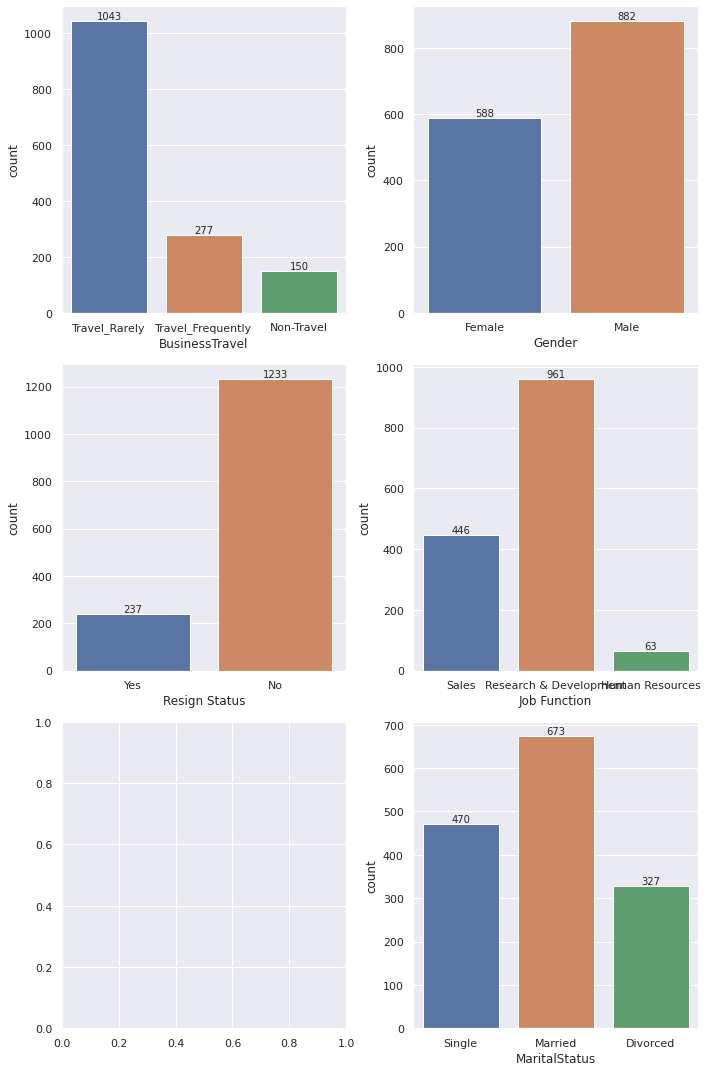

In [12]:
fig, ax = plt.subplots(int(np.ceil(len(qualitativeVariables)/2)), 2, figsize=(10, 15), tight_layout=True)
for i,y in enumerate(qualitativeVariables):
    n=1 if i%2==0 else 0
    g=sns.countplot(x=y,data=emDf,ax=ax[int(np.floor(i/2)),n])
    g.bar_label(g.containers[0])
fig.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Distance Between Company and Home (KM)'}>,
        <AxesSubplot:title={'center':'Education (1 is lowest, 5 is highest)'}>],
       [<AxesSubplot:title={'center':'Job Satisfaction (1 is lowest, 4 is highest)'}>,
        <AxesSubplot:title={'center':'Salary ($)'}>,
        <AxesSubplot:title={'center':'Performance Rating (1 is lowest, 4 is highest)'}>],
       [<AxesSubplot:title={'center':'Work Life Balance (1 is worst, 4 is best)'}>,
        <AxesSubplot:title={'center':'Length of Service (Years)'}>,
        <AxesSubplot:>]], dtype=object)

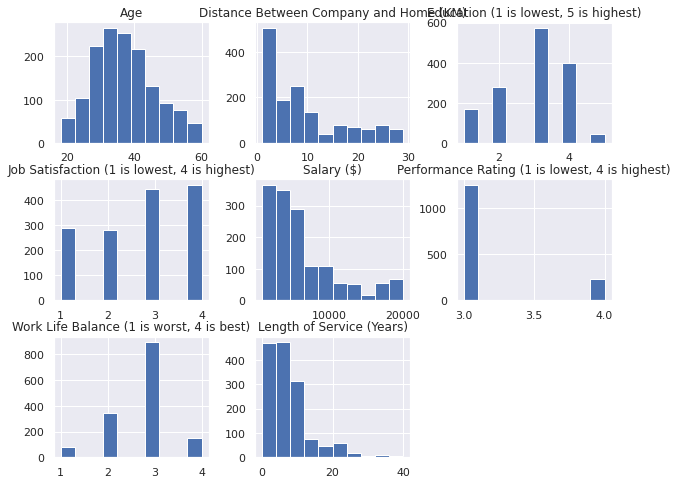

In [13]:
emDf[quantitativeVariables].hist(figsize=(10, 8))

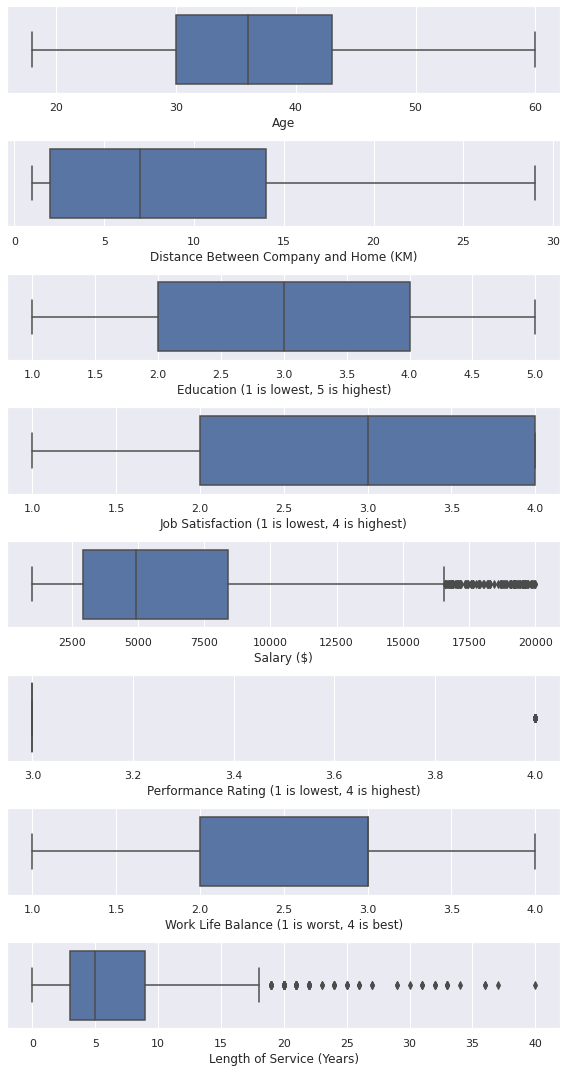

In [14]:
fig, ax = plt.subplots(len(quantitativeVariables), 1, figsize=(8, 15), tight_layout=True)
for idx, feature in enumerate(quantitativeVariables):
    sns.boxplot(data=emDf, x=feature, ax = ax[idx])
fig.show()

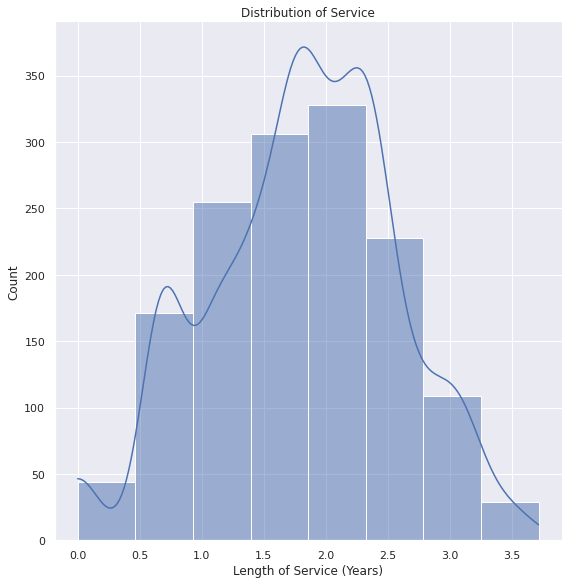

In [15]:
sns.displot(emDf["Length of Service (Years)"].map(np.log1p), kde=True, height = 8,bins=8)
plt.title("Distribution of Service")
plt.show()

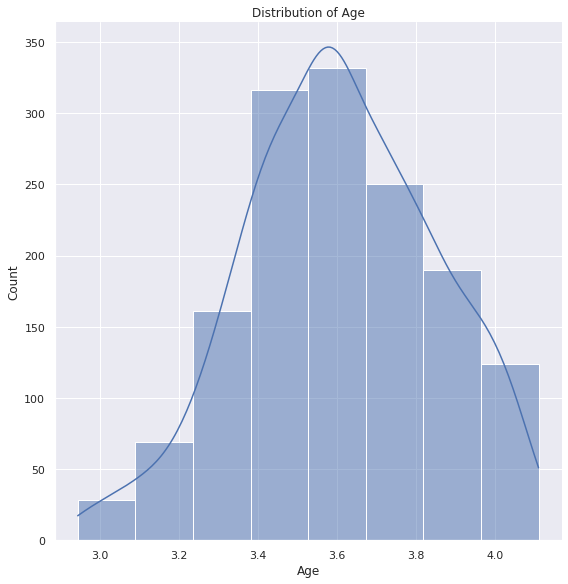

In [16]:

sns.displot(emDf["Age"].map(np.log1p), kde=True, height = 8,bins=8)
plt.title("Distribution of Age")
plt.show()

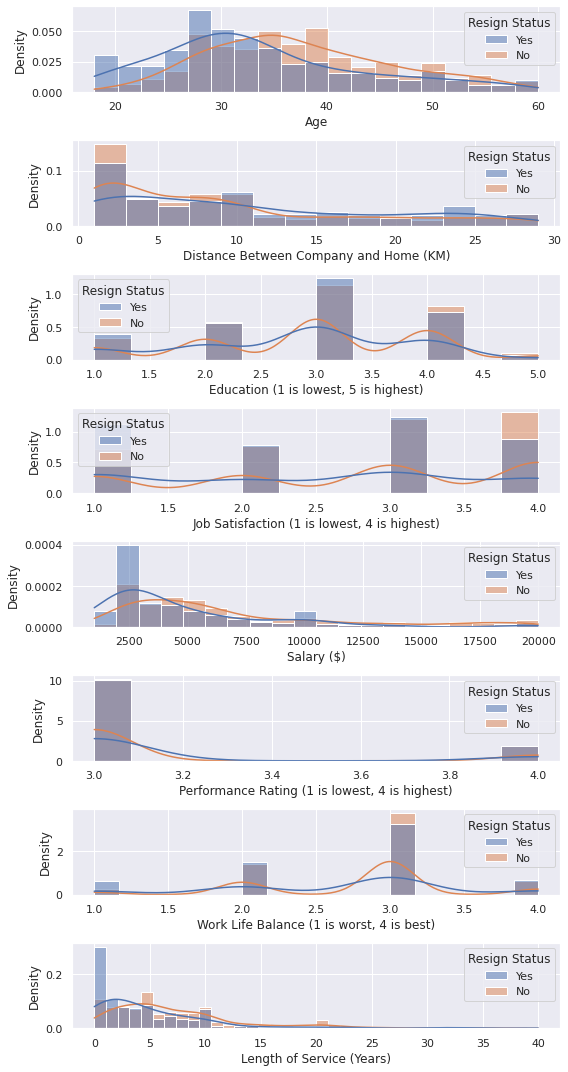

In [17]:
fig, ax = plt.subplots(len(quantitativeVariables), 1, figsize=(8, 15), tight_layout=True)
for idx, feature in enumerate(quantitativeVariables):

    sns.histplot(data=emDf,common_norm = False,stat='density', x=feature, hue="Resign Status",ax=ax[idx],kde=True)
fig.show()

In [18]:
def ratioPlot(data,target,correspond,label):
    while (correspond in target):
        print('Warning: Found target label in array. Ignoring...')
        target.remove(correspond)
    fig, ax = plt.subplots(len(target), 1, figsize=(8, 8), tight_layout=True)

    for idx, feature in enumerate(target):
        unique=data[feature].unique()
        start=[]
        for option in unique:
            start.append(np.sum(data[data[correspond]==label][feature]==option)/np.sum(data[feature]==option))
        qualityPercentage=pd.DataFrame({feature:unique,'Percentage':start})
        if (len(target)==1):
             sns.barplot(data=qualityPercentage,x=feature,y='Percentage',ax=ax)
        else:
                sns.barplot(data=qualityPercentage,x=feature,y='Percentage',ax=ax[idx])
            
       
    return fig.show()
        

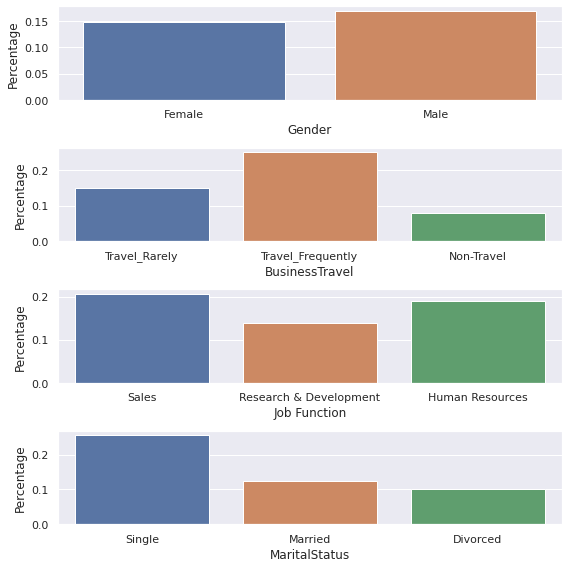

In [19]:
ratioPlot(emDf,qualitativeVariables,'Resign Status','Yes')

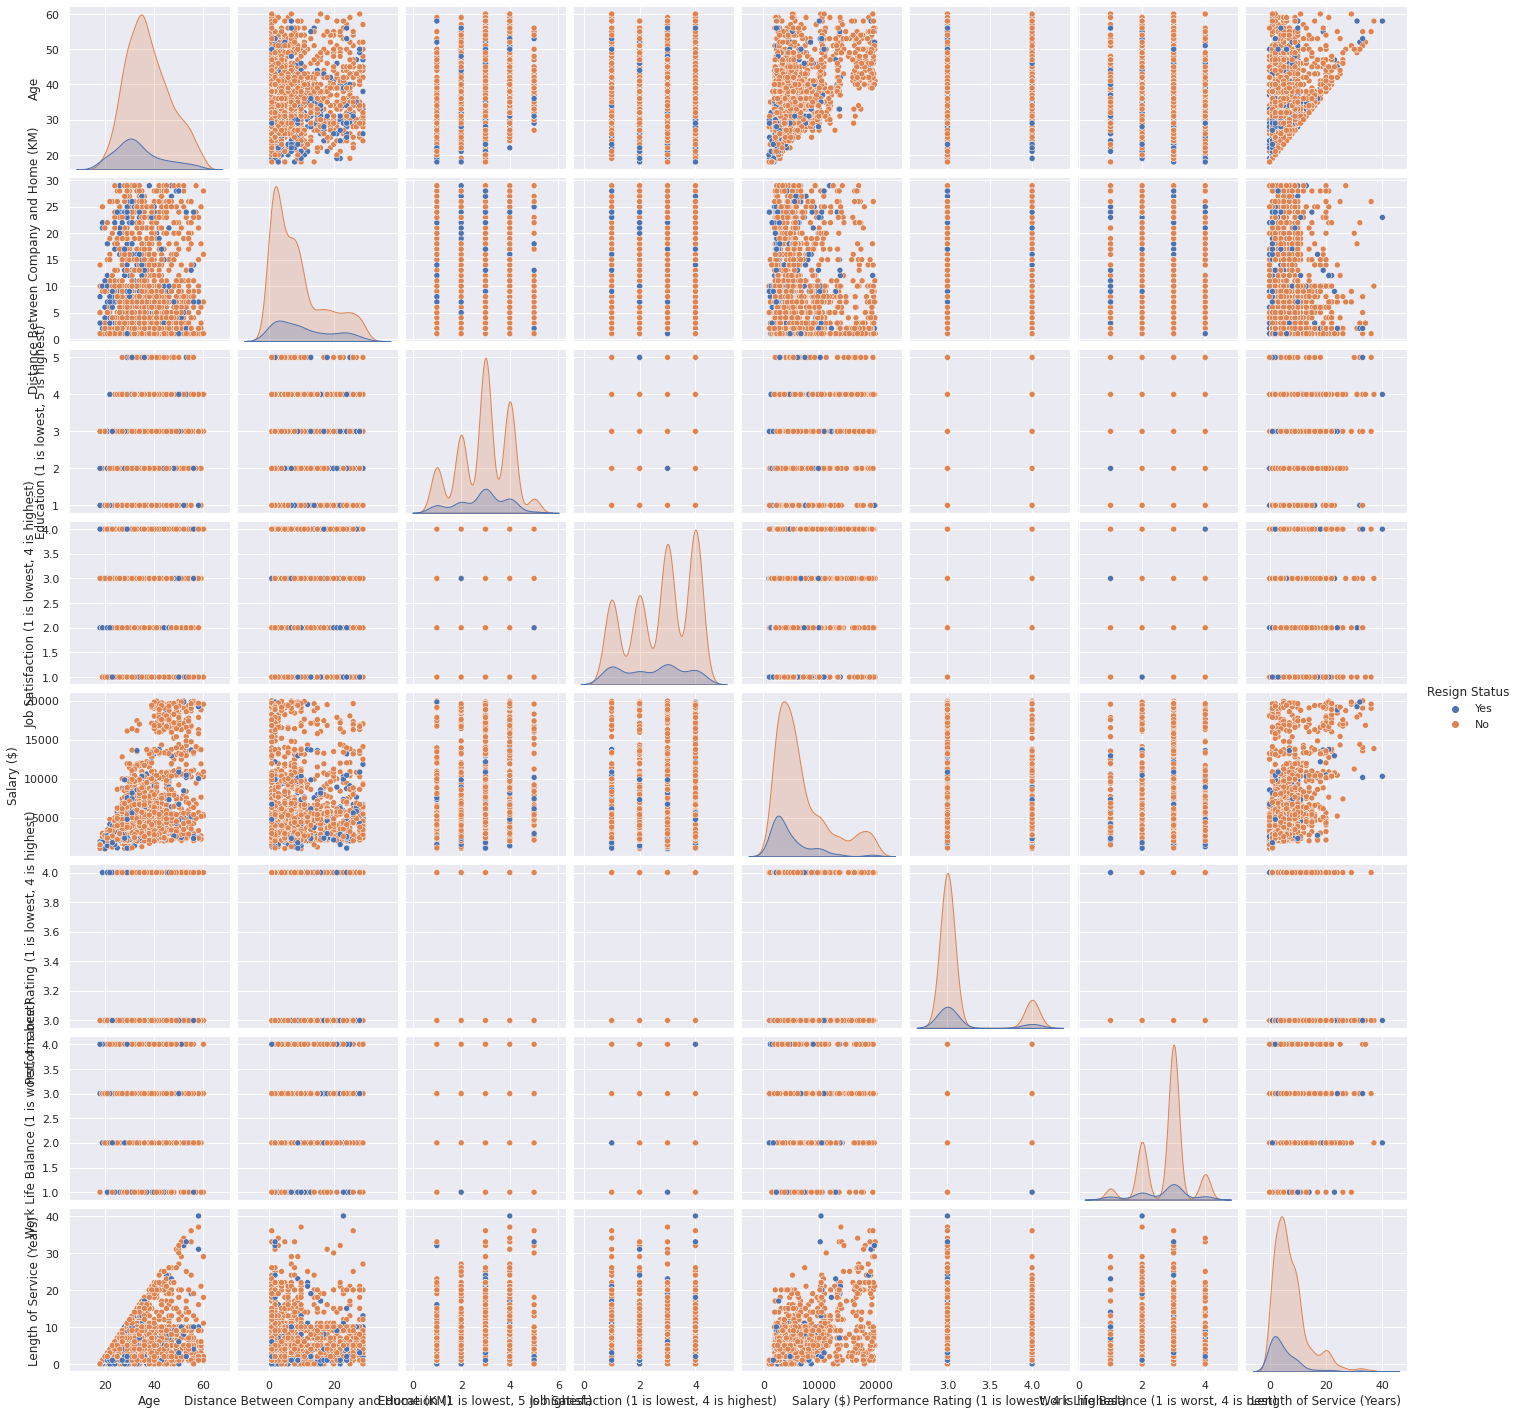

In [20]:
sns.pairplot(emDf, hue="Resign Status")

interval columns not set, guessing: ['Age', 'Distance Between Company and Home (KM)', 'Education (1 is lowest, 5 is highest)', 'Job Satisfaction (1 is lowest, 4 is highest)', 'Salary ($)', 'Performance Rating (1 is lowest, 4 is highest)', 'Work Life Balance (1 is worst, 4 is best)', 'Length of Service (Years)']


Text(0.5, 1.0, 'Correlation Matrix')

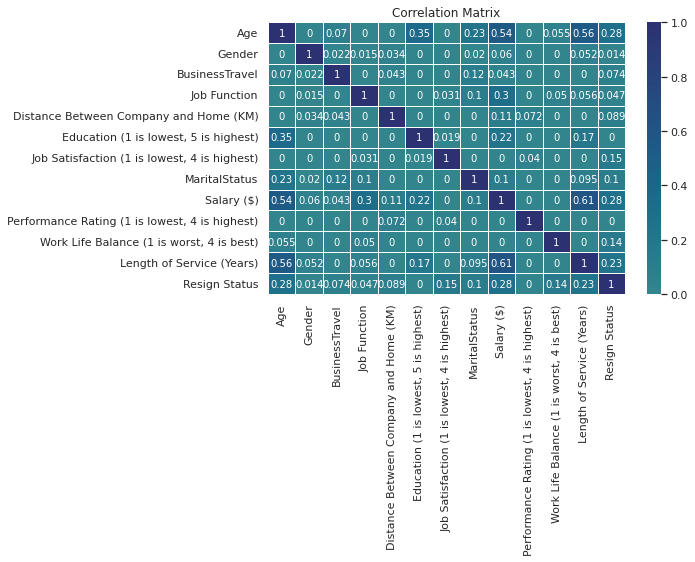

In [21]:
corr_matrix = emDf.phik_matrix()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_matrix, annot = True, linewidths=.5,center = 0,cmap="crest",ax=ax).set_title('Correlation Matrix')

## Data Preprocessing

In [22]:
data_preprocessing = ColumnTransformer([
    ('Preprocess Numerical Features', StandardScaler(), quantitativeVariables),
    
],remainder='passthrough')

In [23]:
x=pd.DataFrame(data_preprocessing.fit_transform(emDf)).convert_dtypes()
x[[8,9,10,11,12]]=x[[8,9,10,11,12]].astype('O')

In [24]:
emDf.dtypes

Age                                                int64
Gender                                            object
BusinessTravel                                    object
Job Function                                      object
Distance Between Company and Home (KM)             int64
Education (1 is lowest, 5 is highest)              int64
Job Satisfaction (1 is lowest, 4 is highest)       int64
MaritalStatus                                     object
Salary ($)                                         int64
Performance Rating (1 is lowest, 4 is highest)     int64
Work Life Balance (1 is worst, 4 is best)          int64
Length of Service (Years)                          int64
Resign Status                                     object
dtype: object

### Dimensionality Reduction

/home/hanhan8808882/.local/lib/python3.9/site-packages/prince/pca.py:45: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  utils.check_array(X)
/home/hanhan8808882/.local/lib/python3.9/site-packages/prince/pca.py:45: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  utils.check_array(X)
/home/hanhan8808882/.local/lib/python3.9/site-packages/prince/pca.py:45: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  util

[Text(0, 0, '0.13'),
 Text(0, 0, '0.21'),
 Text(0, 0, '0.28'),
 Text(0, 0, '0.35'),
 Text(0, 0, '0.42'),
 Text(0, 0, '0.48'),
 Text(0, 0, '0.55'),
 Text(0, 0, '0.61'),
 Text(0, 0, '0.67'),
 Text(0, 0, '0.73'),
 Text(0, 0, '0.79'),
 Text(0, 0, '0.84'),
 Text(0, 0, '0.89')]

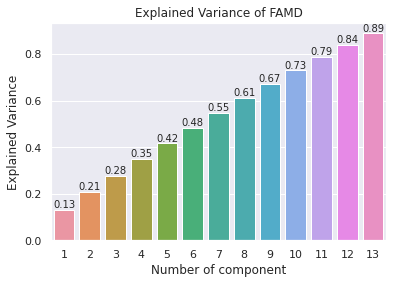

In [25]:
import prince
result=[]
eigen=[]
for n in np.arange(1,14):
    famd = prince.FAMD(n_components=n,check_input=True,)
    famd.fit(x)
    result.append(sum(famd.explained_inertia_))
ax=sns.barplot(np.arange(1,14),result)
plt.title('Explained Variance of FAMD')
plt.xlabel('Number of component')
plt.ylabel('Explained Variance')
ax.bar_label(ax.containers[0], labels=[f'{x:.2f}' for x in ax.containers[0].datavalues])

In [26]:
famd = prince.FAMD(n_components=8,check_input=True,)
x_train=famd.fit_transform(x)
x_train

/home/hanhan8808882/.local/lib/python3.9/site-packages/prince/pca.py:45: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  utils.check_array(X)
/home/hanhan8808882/.local/lib/python3.9/site-packages/prince/pca.py:45: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  utils.check_array(X)


0         1         2         3         4         5         6  \
0    -0.630364  1.473392 -0.309033  0.370125  0.247697 -0.898960 -1.614879   
1     0.318399 -0.562387  0.431014  0.698727  0.802700  1.420040  1.370589   
2    -1.559017  0.273759  0.332049 -0.086739 -0.394369 -0.906245  0.181959   
3    -0.097236 -0.041068 -0.639488  0.145499  0.919305 -0.373188  0.008431   
4    -1.052582 -1.127845 -0.507664 -0.550383 -0.763773  0.340537  0.493293   
...        ...       ...       ...       ...       ...       ...       ...   
1465 -0.577643 -0.608393  0.847798  0.333158  0.530540  0.999384 -0.561243   
1466  0.285920 -0.641387 -0.337665 -0.184098 -1.058968  0.412588  0.923445   
1467 -0.339999 -0.843992 -0.303914  0.243410 -0.268103  0.980049  1.002357   
1468  0.599593  0.428067  0.682593 -0.196023 -0.115752 -0.042349 -0.205258   
1469 -0.264837 -0.846301 -0.188375 -0.810987 -0.546039  0.316376  0.253874   

             7  
0     1.676506  
1     0.927878  
2     0.641484  
3    -0.671536  
4     0.935342  
...        ...  
1465 -0.228221  
1466  1.132861  
1467  0.019226  
1468  0.546491  
1469 -0.632194  

[1470 rows x 8 columns]

In [27]:
# ax = famd.plot_row_coordinates(
#     emDf,
#     ax=None,
#     figsize=(6, 6),
#     x_component=0,
#     y_component=1,
#     color_labels=['{}'.format(t) for t in emDf['Resign Status']],
    
#     ellipse_outline=False,
#     ellipse_fill=True,
#     show_points=True
#  )

### Feature Selection

In [28]:
from skfeature.utility import construct_W
  
kwargs_W = {"metric":"euclidean","neighbor_mode":"knn","weight_mode":"heat_kernel","k":5,'t':1}
  
W = construct_W.construct_W(np.array(x_train ), **kwargs_W)



from skfeature.function.similarity_based import lap_score

   
score = lap_score.lap_score(np.array(x_train ), W=W)

   
print(score)
 
idx = lap_score.feature_ranking(score)




[0.0808408  0.0880984  0.0580714  0.11550363 0.09773724 0.12147092
 0.12986163 0.1509369 ]


In [29]:
# pd.DataFrame({'Feature':featurelist,'Lap Score':score})

In [30]:
maxcomponent=np.arange(2,9)
maxvalue=[]
maxdavi=[]
for i in range(2,9):
    print(i)
    silhouette_avg = []
    davi_avg=[]
    x=np.array(x_train)[:, idx[0:i]]
    for num_clusters in range(2,10):
 
     # initialise kmeans
         
         kmeans = KMeans(n_clusters=num_clusters,init="k-means++",max_iter=100)
         kmeans.fit(pd.DataFrame(x))
         cluster_labels = kmeans.labels_
         silhouette_avg.append(silhouette_score(x, cluster_labels))
         davi_avg.append(davies_bouldin_score(x, cluster_labels))

    maxvalue.append(max(silhouette_avg))
    maxdavi.append(min(davi_avg))

2
3
4
5
6
7
8


/tmp/ipykernel_2458234/936427167.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(maxcomponent,maxvalue,'bx-',color='blue',label='Silhouette')
/tmp/ipykernel_2458234/936427167.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(maxcomponent,maxdavi,'bx-',color='red',label='Davies Bouldin')


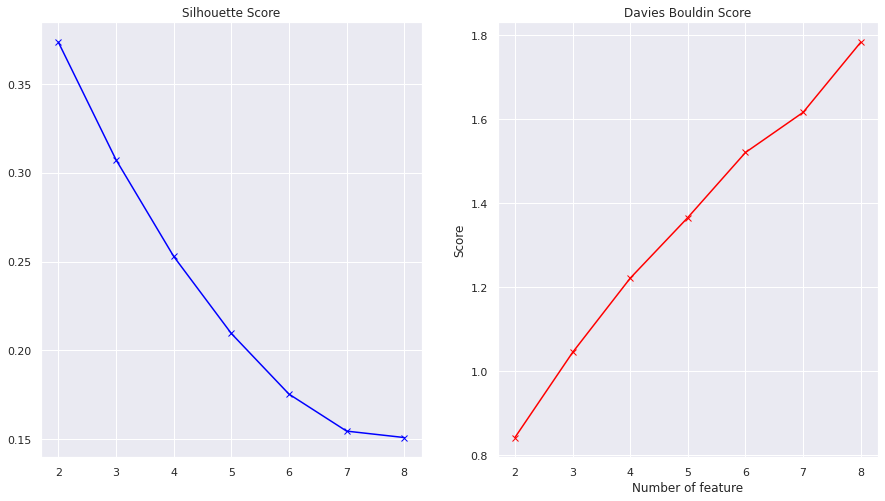

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8))
maxcomponent=np.arange(2,9)
ax1.plot(maxcomponent,maxvalue,'bx-',color='blue',label='Silhouette')
ax1.set_title('Silhouette Score')
ax2.plot(maxcomponent,maxdavi,'bx-',color='red',label='Davies Bouldin')
ax2.set_title('Davies Bouldin Score')
plt.xlabel('Number of feature') 
plt.ylabel('Score') 
# fig.title('Laplacian Scores Feature Selection')
plt.show()

In [32]:
x_train=np.array(x_train)[:, idx[0:2]]

## Model and Evaluation

In [33]:
def algorithm(algo,name='cluster',x='None'):
    al = algo
    result=al.fit_predict(x)
    return result,al

In [34]:
def getCluster(dfCopy,clusters):
    df=dfCopy.copy()
    df['cluster']=clusters
    cluster_centers = df.groupby('cluster').mean()
    cluster_centers['cluster size'] = pd.Series(df['cluster']).value_counts() / len(df['cluster']) * 100
    return cluster_centers,df


In [35]:
def evaluateCluster(x,labels,algName='Undefined testing',record=pd.DataFrame({'name':[],'silihouette_score':[],'davies_bouldin_score':[]})):
    '''
    This function is used for model evaluation . 
    '''
    current=pd.DataFrame({'name':[algName],'silihouette_score':[silhouette_score(x,labels)],'davies_bouldin_score':[davies_bouldin_score(x,labels)],})
    record=pd.concat([record,current],ignore_index=True)
    display(skplt.metrics.plot_silhouette(x,labels))
    return current,record

In [105]:
def qualitativeEvaluation(data):

    fig, ax = plt.subplots(int(np.ceil(len(qualitativeVariables)/2)), 2, figsize=(10, 12), tight_layout=True)
    for i,fea in enumerate(qualitativeVariables):
        n=1 if i%2==0 else 0

        (data.groupby('cluster')[fea].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.barplot,'data'), x='cluster',y='percent',hue=fea,ax=ax[int(np.floor(i/2)),n]))
    return fig.show()

In [36]:
def GridSearchForK(x=None,start=2,end=15,algorithm=SpectralClustering,**kwrg):
    x=x.copy()
    silhouette_avg = []
    davies_avg=[]
    rangeSearch=range(start,end)
    for num_clusters in rangeSearch:
 
     
        sci = algorithm(n_clusters=num_clusters,**kwrg)
        if (hasattr(algorithm(),'random_state')):
            sci = algorithm(n_clusters=num_clusters,random_state=42,**kwrg)
        sci.fit(x)
        cluster_labels = sci.labels_
 
    # silhouette score
        davies_avg.append(davies_bouldin_score(x, cluster_labels))
        silhouette_avg.append(silhouette_score(x, cluster_labels))
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8))   
    ax1.plot(rangeSearch,silhouette_avg,'bx-',color='blue',label='Silhouette')
    ax1.set_title('Silhouette Score')
    ax2.plot(rangeSearch,davies_avg,'bx-',color='red',label='Davies Bouldin')
    ax2.set_title('Davies Bouldin Score')
    plt.xlabel('Values of K') 
    return fig.show()
    

### KMethoid

/tmp/ipykernel_2458234/3792593614.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(rangeSearch,silhouette_avg,'bx-',color='blue',label='Silhouette')
/tmp/ipykernel_2458234/3792593614.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(rangeSearch,davies_avg,'bx-',color='red',label='Davies Bouldin')


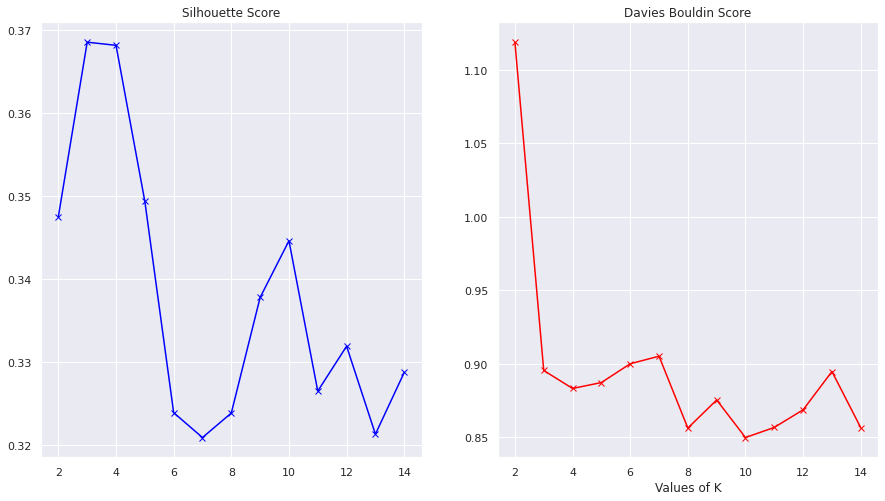

In [37]:
GridSearchForK(x_train,2,15,KMedoids,method='pam')

In [38]:
result,kme=algorithm(KMedoids(n_clusters=4,method='pam'),'cluster',x_train)
evaluation,kmeDf=getCluster(emDf,result)
evaluation

Age  Distance Between Company and Home (KM)  \
cluster                                                      
0        28.856764                                9.408488   
1        47.916667                                8.720833   
2        38.239837                               10.605691   
3        36.246537                                7.354571   

         Education (1 is lowest, 5 is highest)  \
cluster                                          
0                                     2.456233   
1                                     3.166667   
2                                     3.150407   
3                                     2.897507   

         Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
cluster                                                               
0                                            2.676393   3183.464191   
1                                            2.691667  14748.033333   
2                                            2.904472   6027.711382   
3                                            2.567867   5135.681440   

         Performance Rating (1 is lowest, 4 is highest)  \
cluster                                                   
0                                              3.151194   
1                                              3.150000   
2                                              3.140244   
3                                              3.177285   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
cluster                                                                         
0                                         2.676393                   3.241379   
1                                         2.762500                  14.529167   
2                                         2.802846                   7.036585   
3                                         2.792244                   5.903047   

         cluster size  
cluster                
0           25.646259  
1           16.326531  
2           33.469388  
3           24.557823

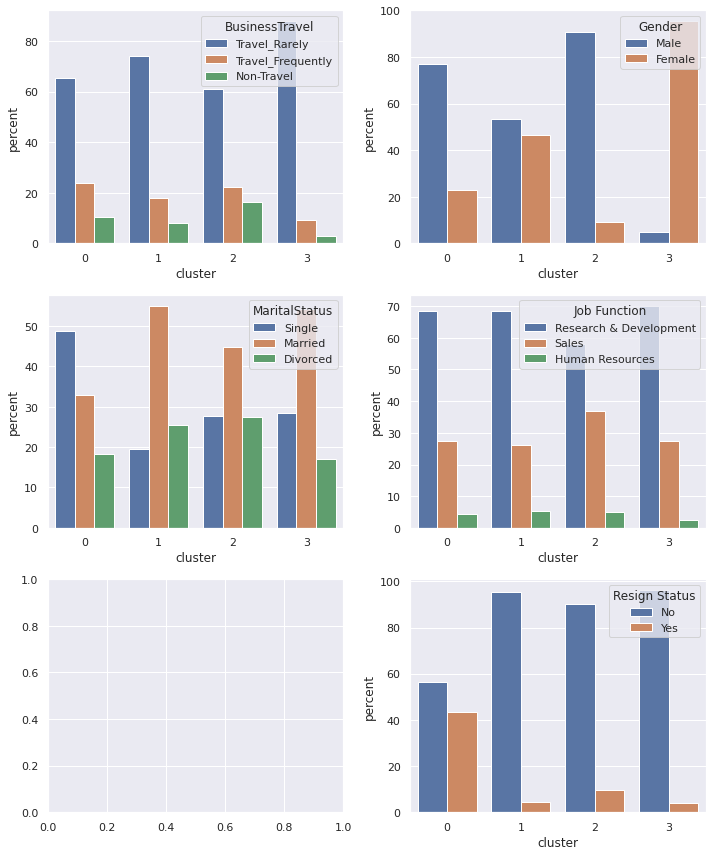

In [106]:

qualitativeEvaluation(kmeDf)


In [96]:
kmeDf.groupby('cluster')['Resign Status'].describe()

count unique top freq
cluster                      
0         377      2  No  213
1         240      2  No  229
2         492      2  No  444
3         361      2  No  347

/home/hanhan8808882/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

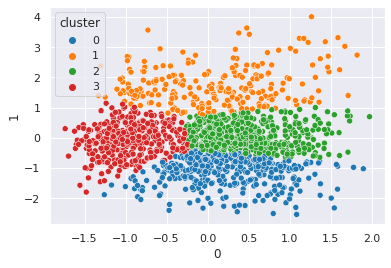

In [39]:
sns.scatterplot(pd.DataFrame(x_train)[0],pd.DataFrame(x_train)[1],hue=kmeDf.cluster, palette="tab10")

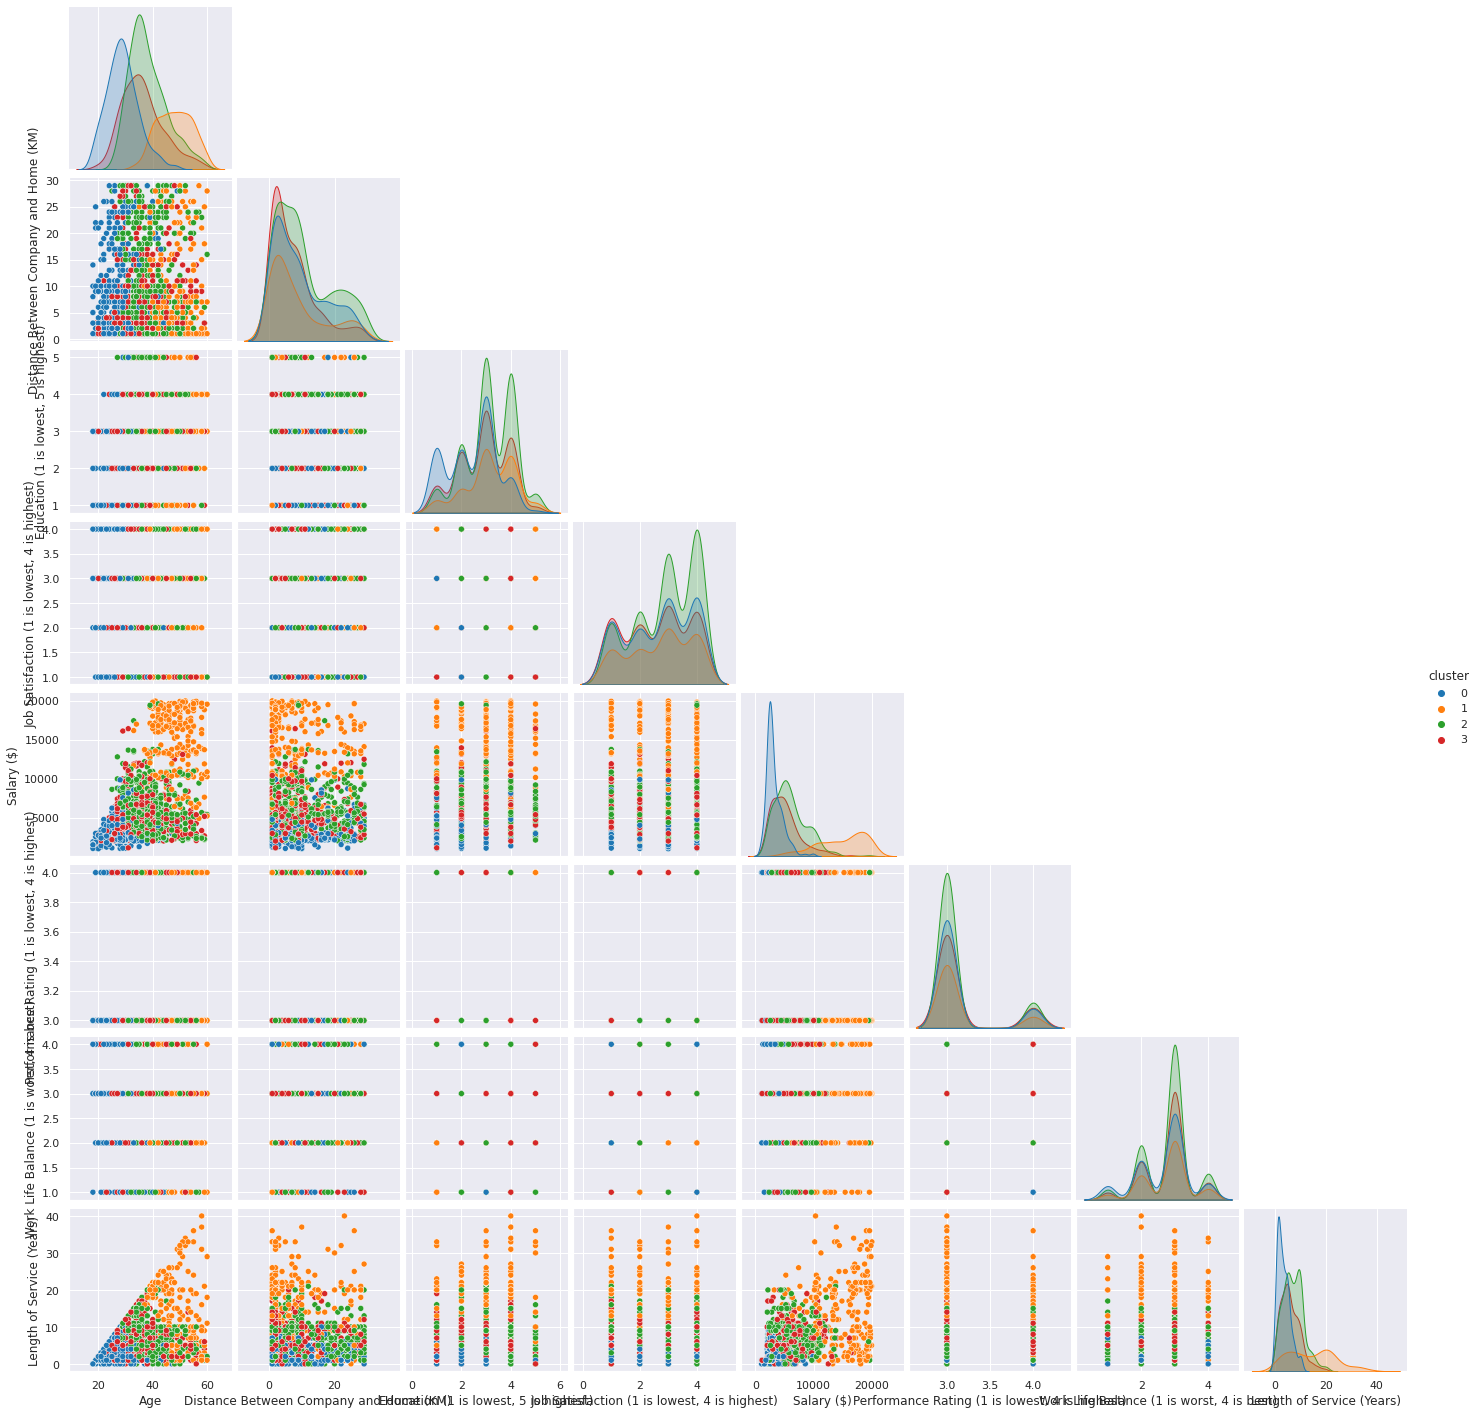

In [40]:
sns.pairplot(kmeDf, hue='cluster', corner=True, palette="tab10")

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

name  silihouette_score  davies_bouldin_score
0  KMethoid           0.368147              0.883279

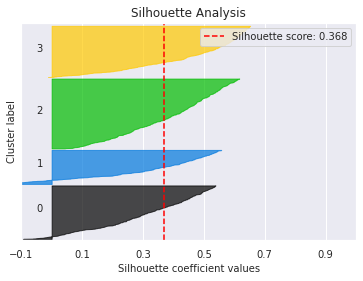

In [41]:
current,record=evaluateCluster(x_train,result,'KMethoid')
current

### K means

In [42]:
def k_cluster(x):
    fig, ax = plt.subplots(figsize=(10,5))

    inertia = []
    for no_cluster in range(1,11):
        model = KMeans(n_clusters=no_cluster,init="k-means++",max_iter=100)
        clusters = model.fit_predict(x)
        print('loop '+str(no_cluster))
        inertia.append(model.inertia_)
    ax.plot(list(range(1, 11)), inertia, 'o-')  
    ax.set_title("Elbow Plot")
    ax.set_ylabel('Inertia')
    ax.set_xlabel('No of Clusters')
    return fig.show()

loop 1
loop 2
loop 3
loop 4
loop 5
loop 6
loop 7
loop 8
loop 9
loop 10


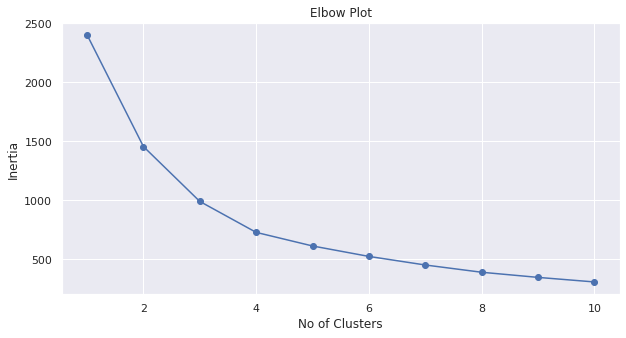

In [43]:
k_cluster(x_train)

In [44]:
result,km=algorithm(KMeans(n_clusters=4,init="k-means++",max_iter=100),'cluster',x_train)
evaluation,kmDf=getCluster(emDf,result)
evaluation

Age  Distance Between Company and Home (KM)  \
cluster                                                      
0        28.907895                                9.521053   
1        48.239631                                8.414747   
2        36.314667                                7.400000   
3        38.568273                               10.630522   

         Education (1 is lowest, 5 is highest)  \
cluster                                          
0                                     2.463158   
1                                     3.161290   
2                                     2.904000   
3                                     3.154618   

         Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
cluster                                                               
0                                            2.671053   3191.913158   
1                                            2.695853  15239.041475   
2                                            2.570667   5165.362667   
3                                            2.905622   6229.917671   

         Performance Rating (1 is lowest, 4 is highest)  \
cluster                                                   
0                                              3.150000   
1                                              3.147465   
2                                              3.176000   
3                                              3.142570   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
cluster                                                                         
0                                         2.673684                   3.297368   
1                                         2.760369                  14.958525   
2                                         2.789333                   5.946667   
3                                         2.807229                   7.174699   

         cluster size  
cluster                
0           25.850340  
1           14.761905  
2           25.510204  
3           33.877551

/home/hanhan8808882/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

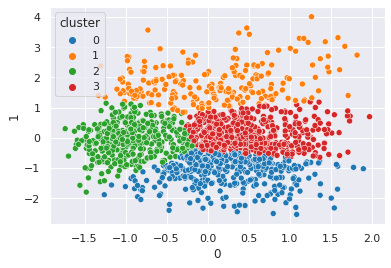

In [45]:
sns.scatterplot(pd.DataFrame(x_train)[0],pd.DataFrame(x_train)[1],hue=kmDf.cluster, palette="tab10")

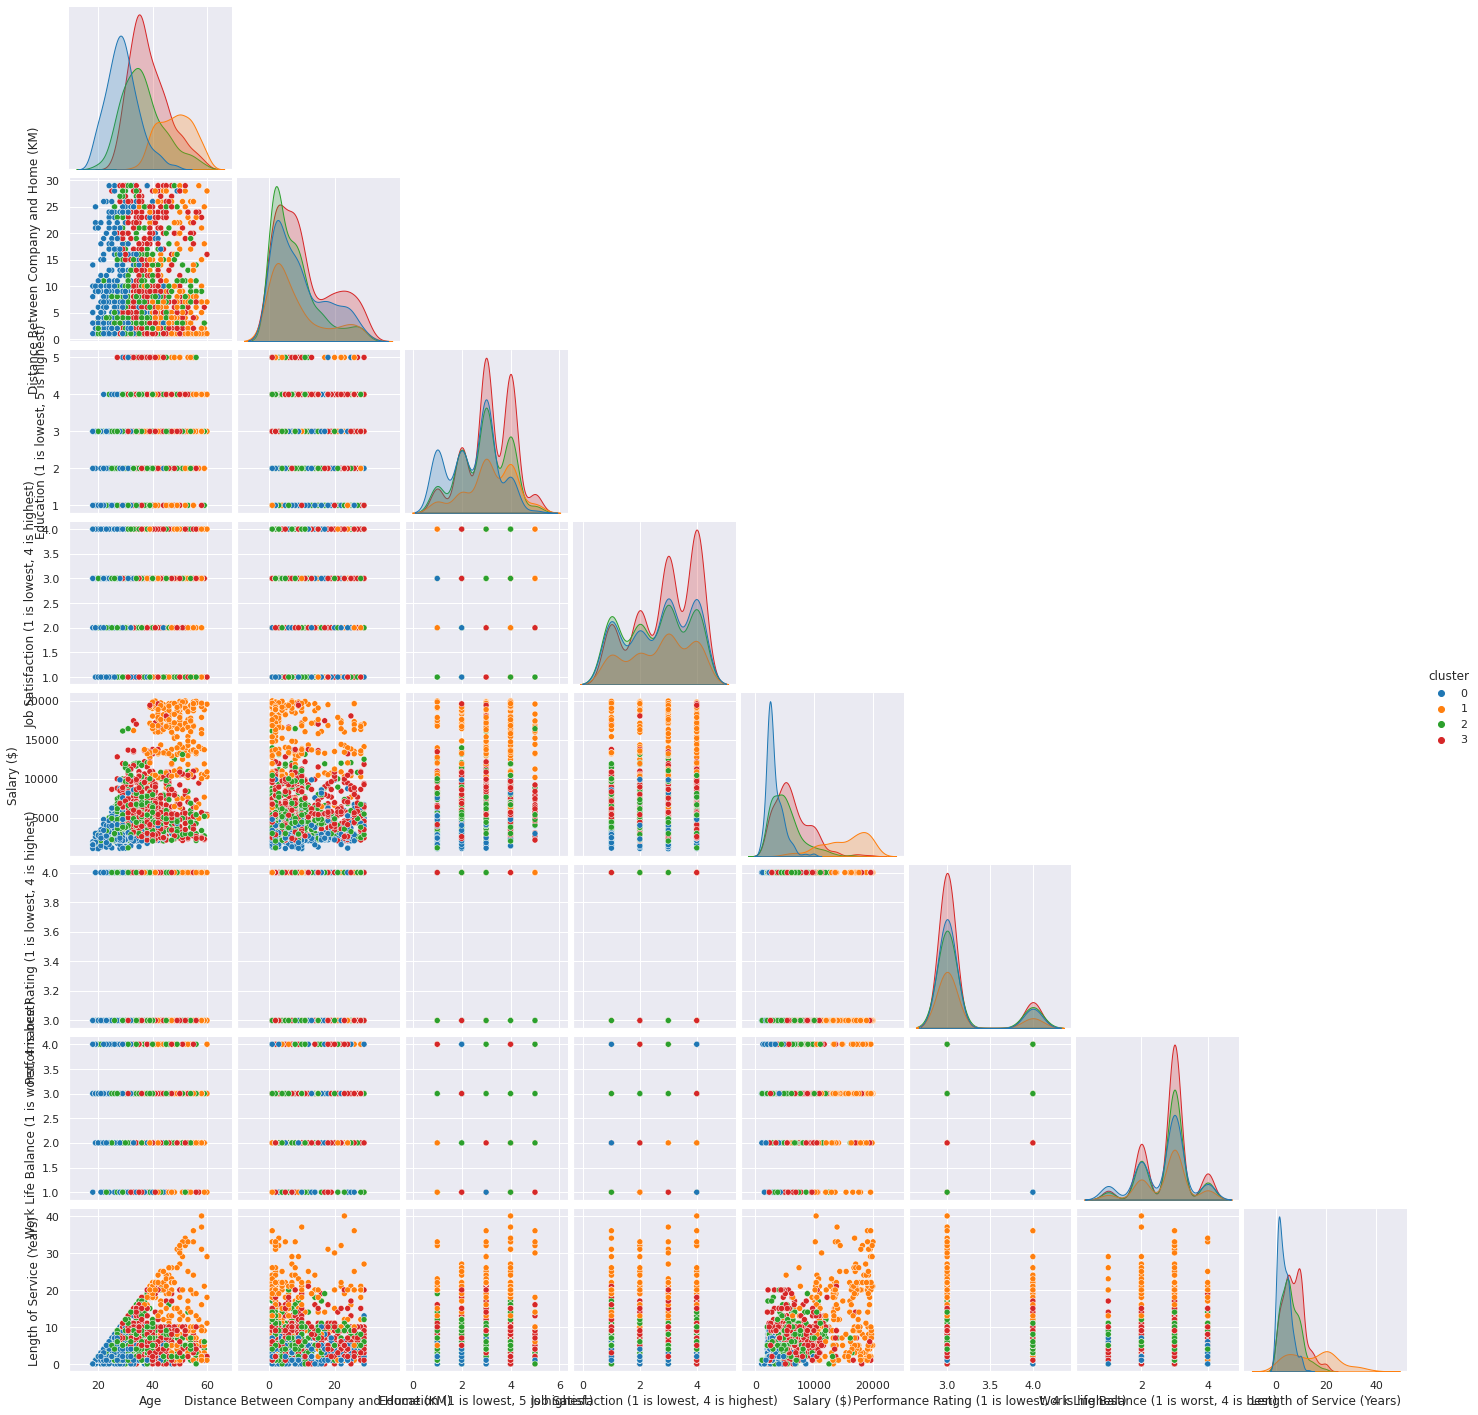

In [46]:
sns.pairplot(kmDf, hue='cluster', corner=True, palette="tab10")

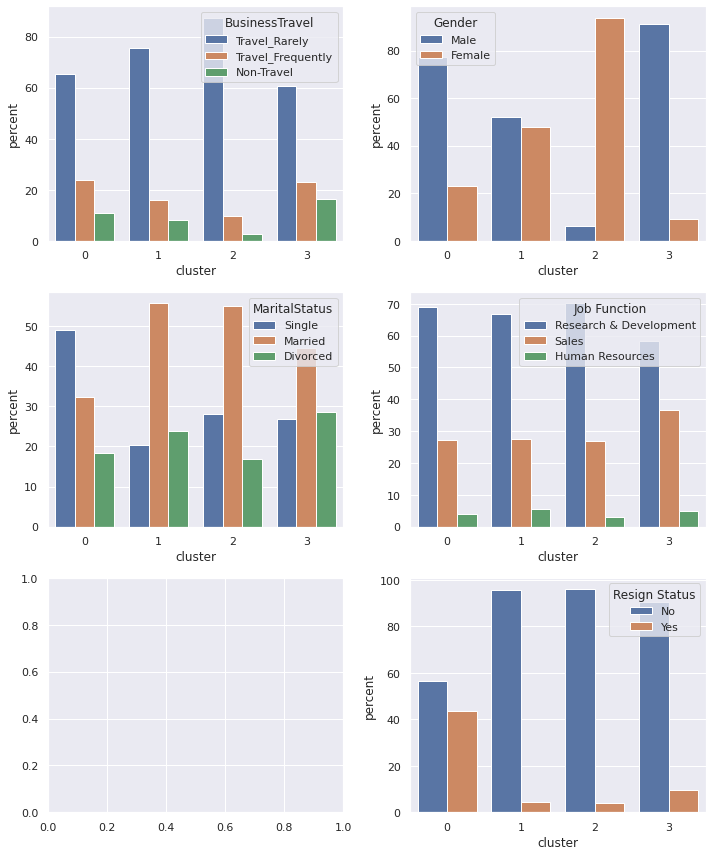

In [110]:
qualitativeEvaluation(kmDf)

/tmp/ipykernel_2458234/3792593614.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(rangeSearch,silhouette_avg,'bx-',color='blue',label='Silhouette')
/tmp/ipykernel_2458234/3792593614.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(rangeSearch,davies_avg,'bx-',color='red',label='Davies Bouldin')


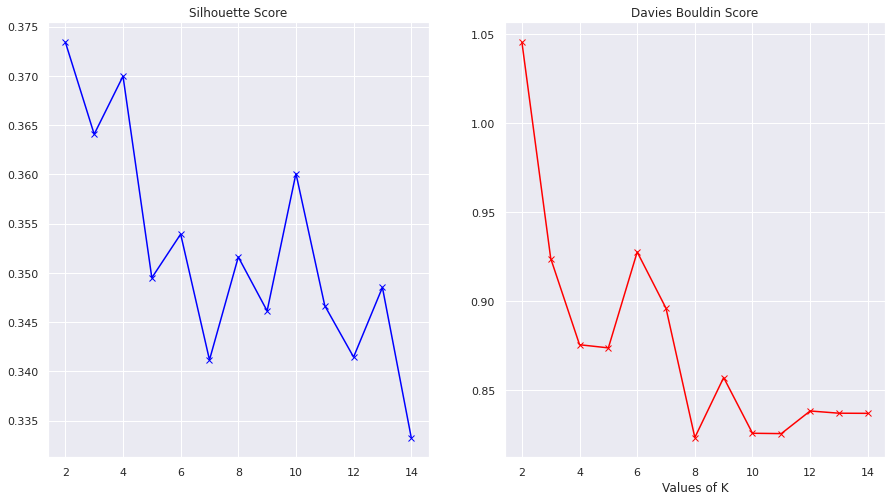

In [47]:
GridSearchForK(x_train,2,15,KMeans,init="k-means++",max_iter=100)

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

name  silihouette_score  davies_bouldin_score
0  KMeans++           0.370817              0.874783

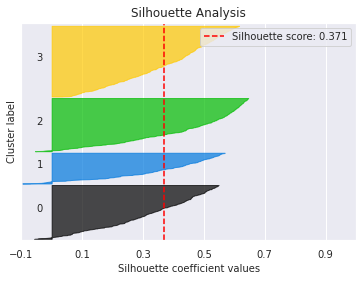

In [48]:
current,record=evaluateCluster(x_train,result,'KMeans++',record)
current

### Agglomerative Clustering

In [49]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


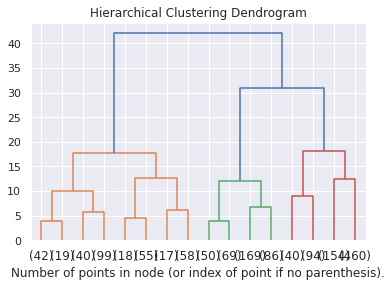

In [50]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(x_train)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [51]:
result,hiera=algorithm(AgglomerativeClustering(n_clusters=3),'cluster',x_train)
evaluation,hiDf=getCluster(emDf,result)
evaluation

Age  Distance Between Company and Home (KM)  \
cluster                                                      
0        32.602941                                9.756684   
1        45.847701                                9.632184   
2        37.262032                                7.655080   

         Education (1 is lowest, 5 is highest)  \
cluster                                          
0                                     2.732620   
1                                     3.218391   
2                                     2.989305   

         Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
cluster                                                               
0                                            2.774064   4193.629679   
1                                            2.787356  12558.979885   
2                                            2.582888   5486.494652   

         Performance Rating (1 is lowest, 4 is highest)  \
cluster                                                   
0                                              3.155080   
1                                              3.140805   
2                                              3.163102   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
cluster                                                                         
0                                         2.728610                   4.733957   
1                                         2.772989                  12.885057   
2                                         2.815508                   6.088235   

         cluster size  
cluster                
0           50.884354  
1           23.673469  
2           25.442177

/home/hanhan8808882/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

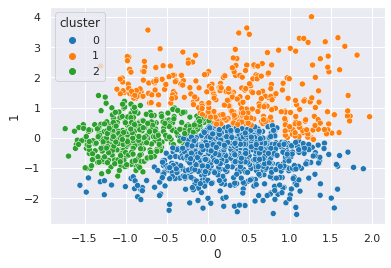

In [52]:
sns.scatterplot(pd.DataFrame(x_train)[0],pd.DataFrame(x_train)[1],hue=hiDf.cluster, palette="tab10")

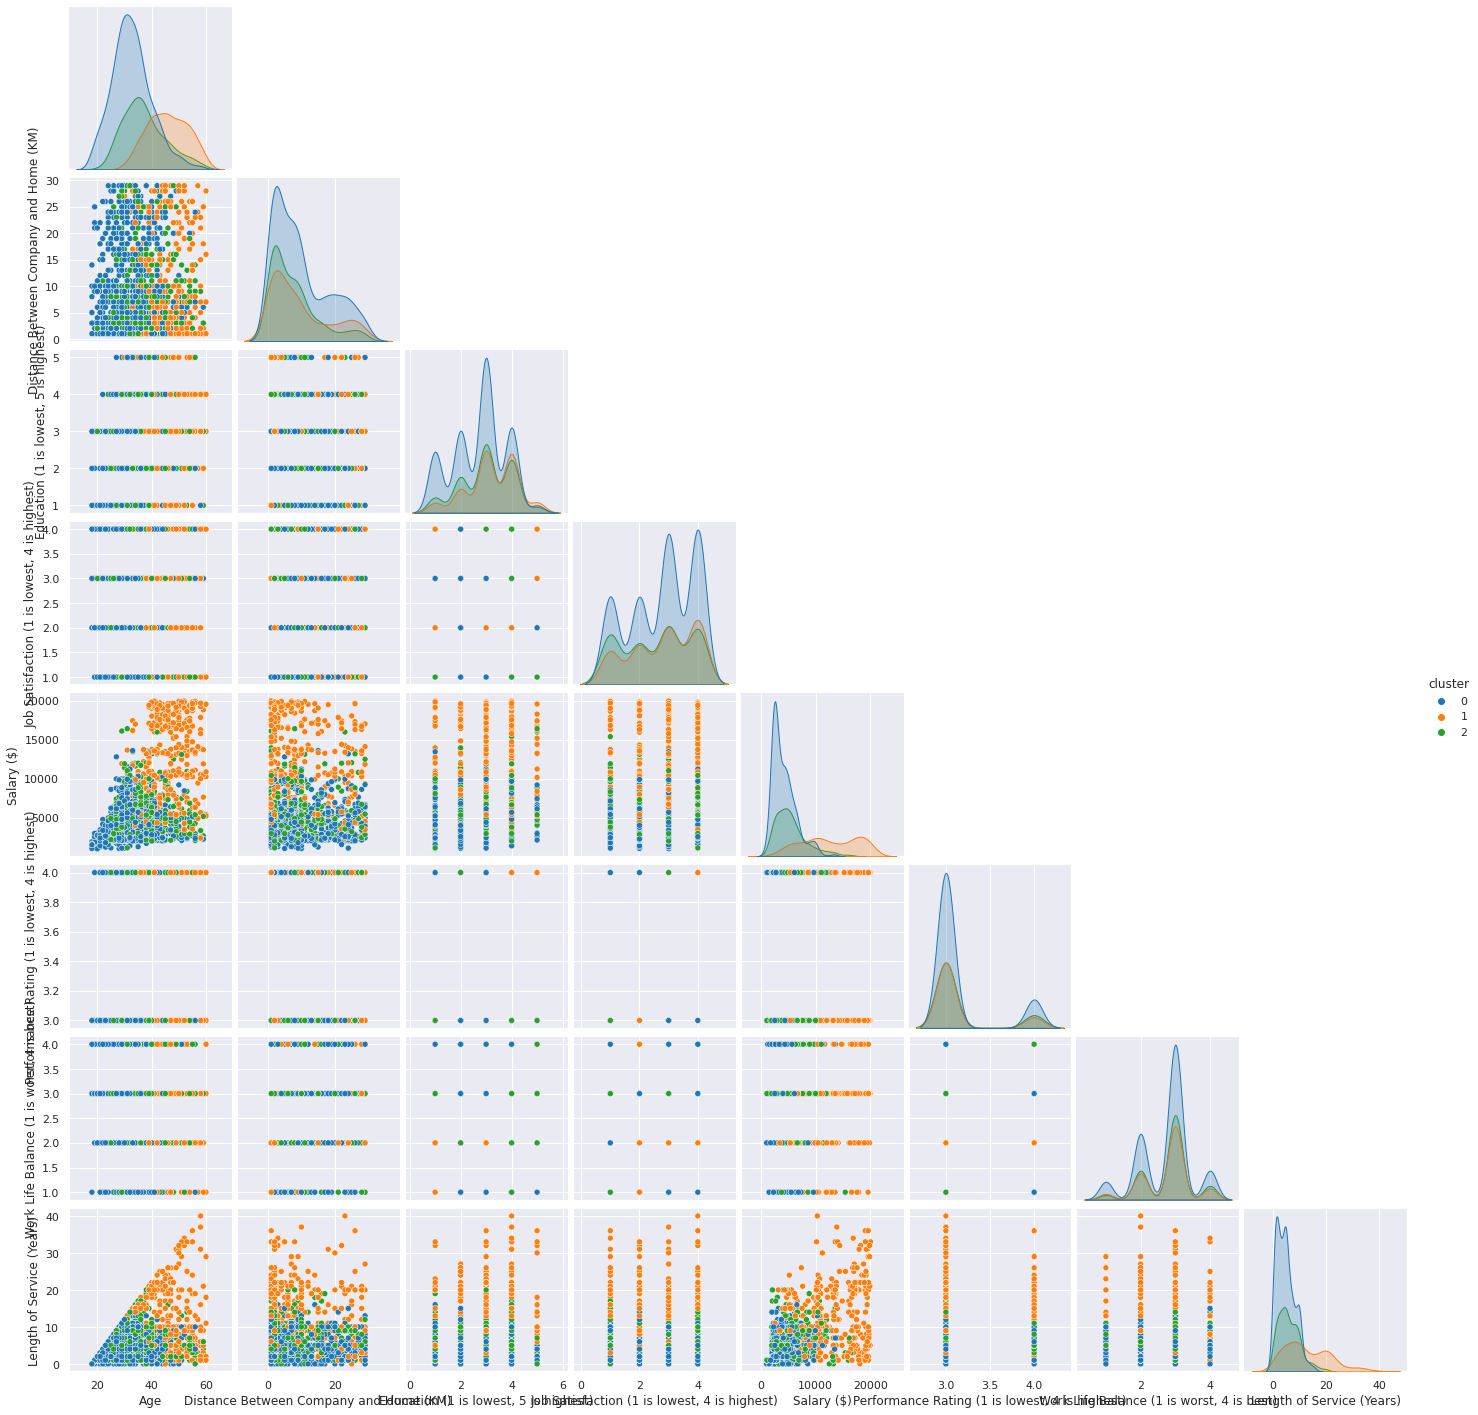

In [53]:
sns.pairplot(hiDf, hue='cluster', corner=True, palette="tab10")

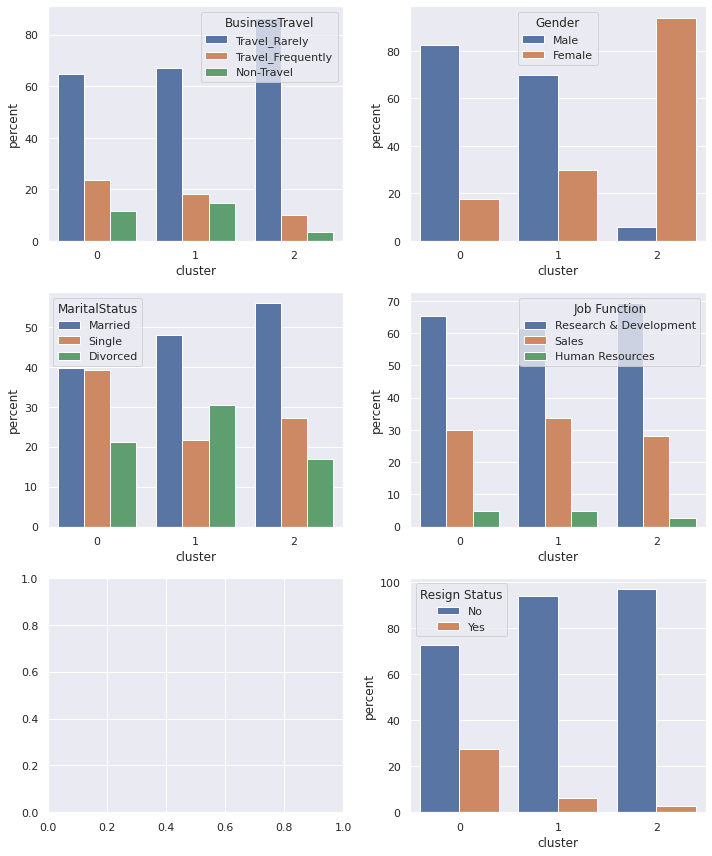

In [109]:

qualitativeEvaluation(hiDf)

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

name  silihouette_score  davies_bouldin_score
0  Hierarchical Clustering            0.35473              0.902888

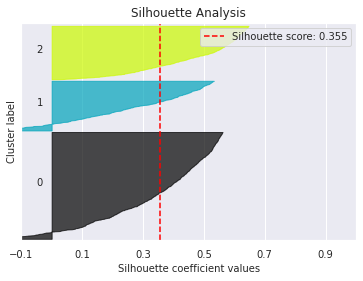

In [54]:

current,record=evaluateCluster(x_train,result,'Hierarchical Clustering',record)
current

/tmp/ipykernel_2458234/3792593614.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(rangeSearch,silhouette_avg,'bx-',color='blue',label='Silhouette')
/tmp/ipykernel_2458234/3792593614.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(rangeSearch,davies_avg,'bx-',color='red',label='Davies Bouldin')


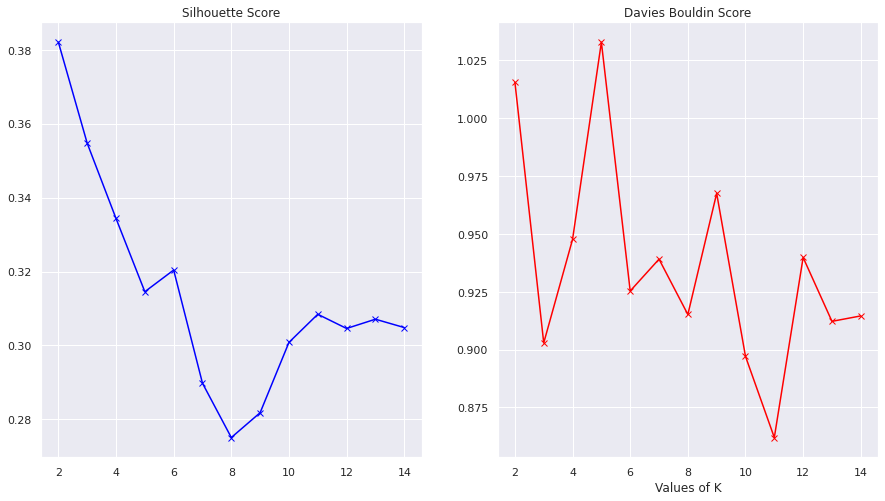

In [55]:
GridSearchForK(x_train,2,15,AgglomerativeClustering)

### DBSCAN

In [56]:
def elbatta_eps(X):
    distances, indices = NearestNeighbors(n_neighbors=3).fit(X).kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(distances)
    ax.set_title("Elbatta's EPs Plot")
    ax.set_ylabel('eps')
    return fig.show()

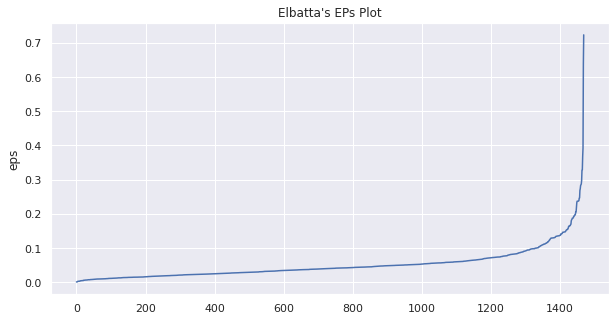

In [57]:
elbatta_eps(x_train)

In [58]:

result,dbscan=algorithm(DBSCAN(eps=0.25),'cluster',x_train)
evaluation,dbDf=getCluster(emDf,result)
evaluation

Age  Distance Between Company and Home (KM)  \
cluster                                                      
-1       41.705882                               10.176471   
 0       36.751938                                9.157153   

         Education (1 is lowest, 5 is highest)  \
cluster                                          
-1                                    2.882353   
 0                                    2.914024   

         Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
cluster                                                               
-1                                           2.588235  12113.823529   
 0                                           2.733615   6301.271318   

         Performance Rating (1 is lowest, 4 is highest)  \
cluster                                                   
-1                                             3.137255   
 0                                             3.154334   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
cluster                                                                         
-1                                        2.745098                  18.901961   
 0                                        2.761804                   6.580691   

         cluster size  
cluster                
-1           3.469388  
 0          96.530612

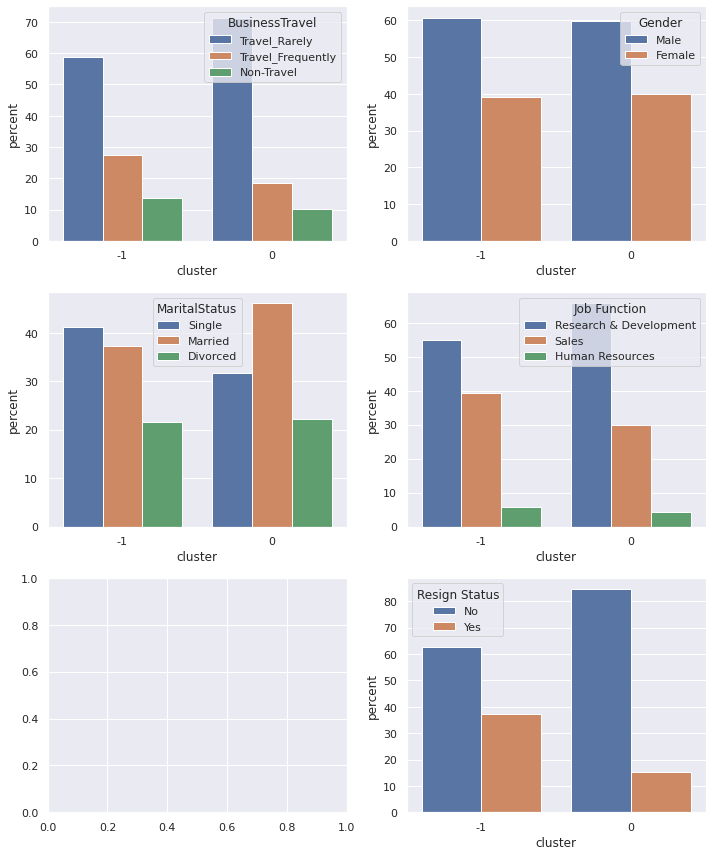

In [112]:

qualitativeEvaluation(dbDf)

/home/hanhan8808882/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

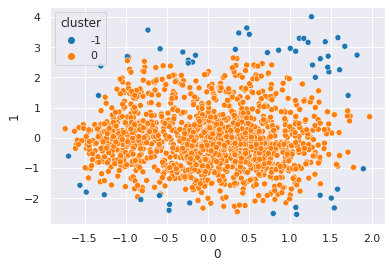

In [59]:
sns.scatterplot(pd.DataFrame(x_train)[0],pd.DataFrame(x_train)[1],hue=dbDf.cluster, palette="tab10")

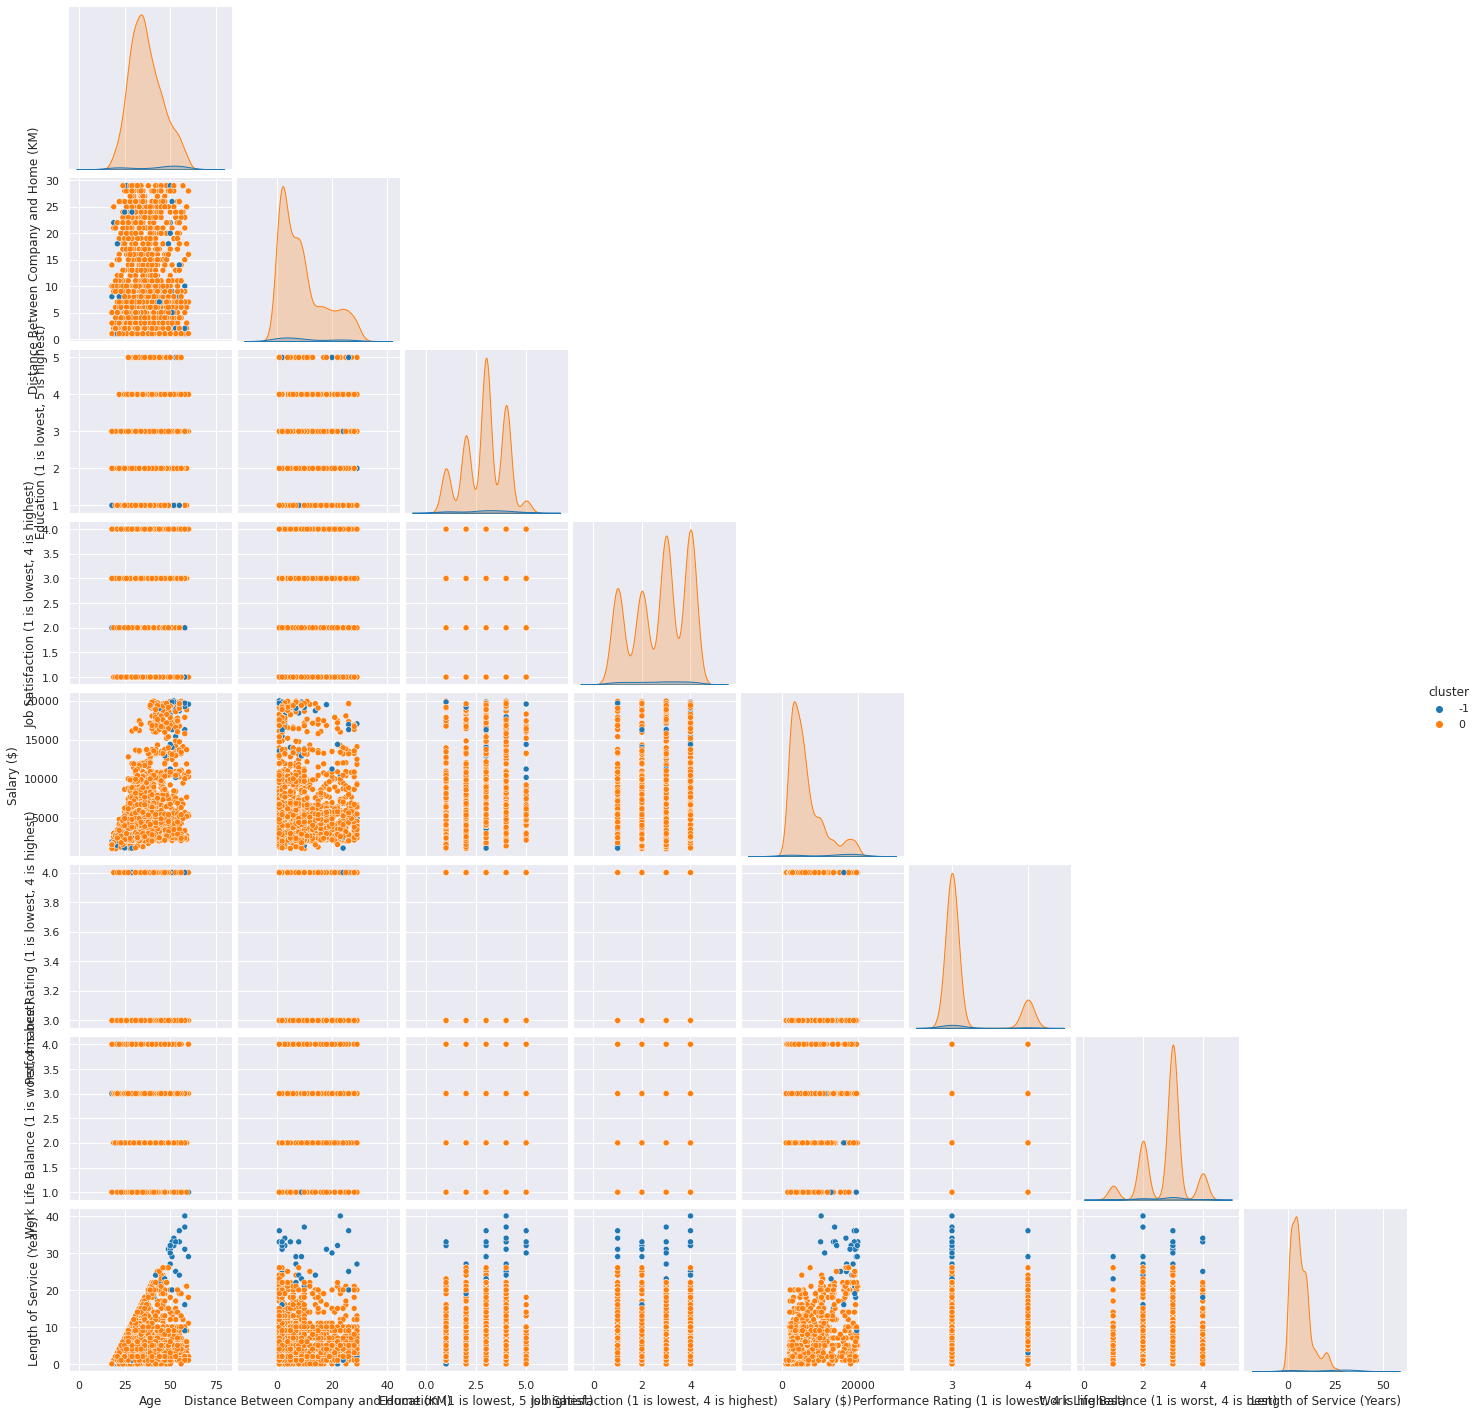

In [60]:
sns.pairplot(dbDf, hue='cluster', corner=True, palette="tab10")


<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

name  silihouette_score  davies_bouldin_score
0  DBSCAN           0.471174              2.528541

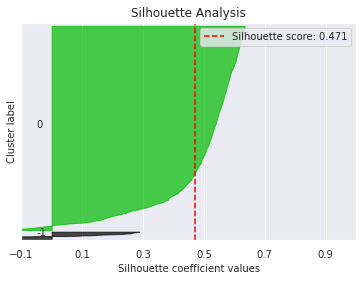

In [61]:
current,record=evaluateCluster(x_train,result,'DBSCAN',record)
current

### SpectralClustering

In [62]:
result,spclust=algorithm(SpectralClustering(n_clusters=2),'cluster',x_train)
evaluation,scDf=getCluster(emDf,result)
evaluation

Age  Distance Between Company and Home (KM)  \
cluster                                                      
0        35.840892                                9.193309   
1        48.576000                                9.184000   

         Education (1 is lowest, 5 is highest)  \
cluster                                          
0                                     2.892937   
1                                     3.128000   

         Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
cluster                                                               
0                                            2.732342   5552.371004   
1                                            2.688000  16730.960000   

         Performance Rating (1 is lowest, 4 is highest)  \
cluster                                                   
0                                              3.154647   
1                                              3.144000   

         Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
cluster                                                                         
0                                         2.752416                   5.888476   
1                                         2.856000                  19.056000   

         cluster size  
cluster                
0           91.496599  
1            8.503401

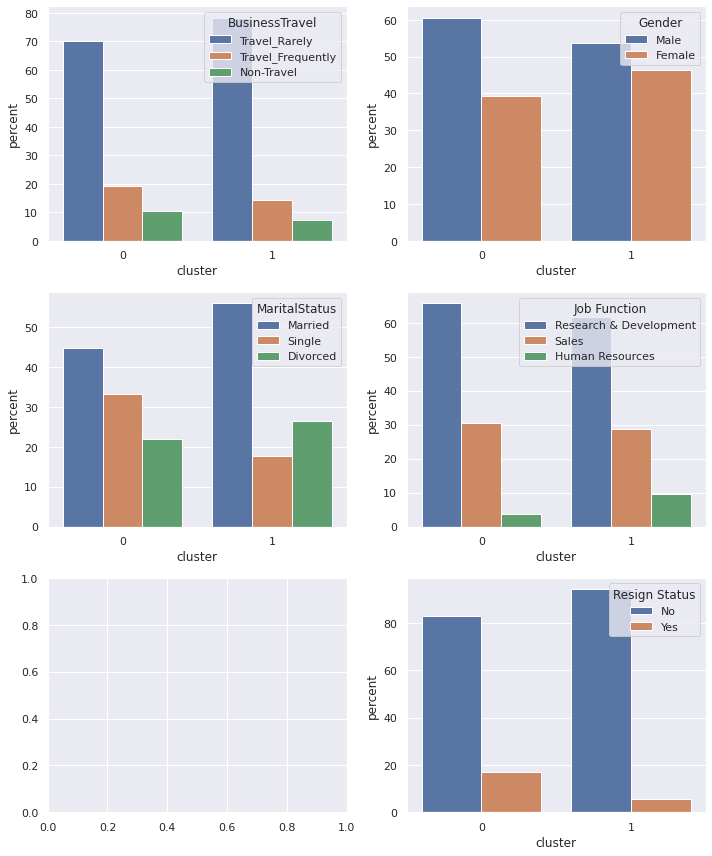

In [113]:

qualitativeEvaluation(scDf)

/home/hanhan8808882/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

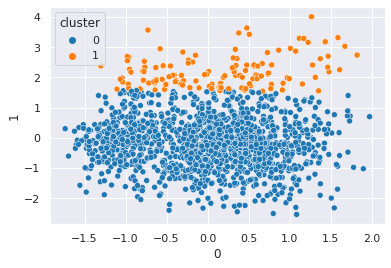

In [63]:
sns.scatterplot(pd.DataFrame(x_train)[0],pd.DataFrame(x_train)[1],hue=scDf.cluster, palette="tab10")

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

name  silihouette_score  davies_bouldin_score
0  Spectral Clustering           0.448073              0.744779

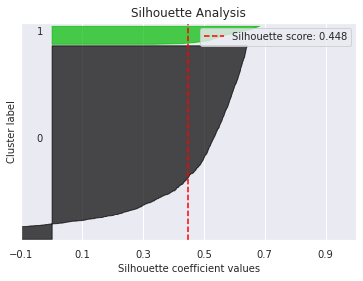

In [64]:
current,record=evaluateCluster(x_train,result,'Spectral Clustering',record)
current

/tmp/ipykernel_2458234/3792593614.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(rangeSearch,silhouette_avg,'bx-',color='blue',label='Silhouette')
/tmp/ipykernel_2458234/3792593614.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(rangeSearch,davies_avg,'bx-',color='red',label='Davies Bouldin')


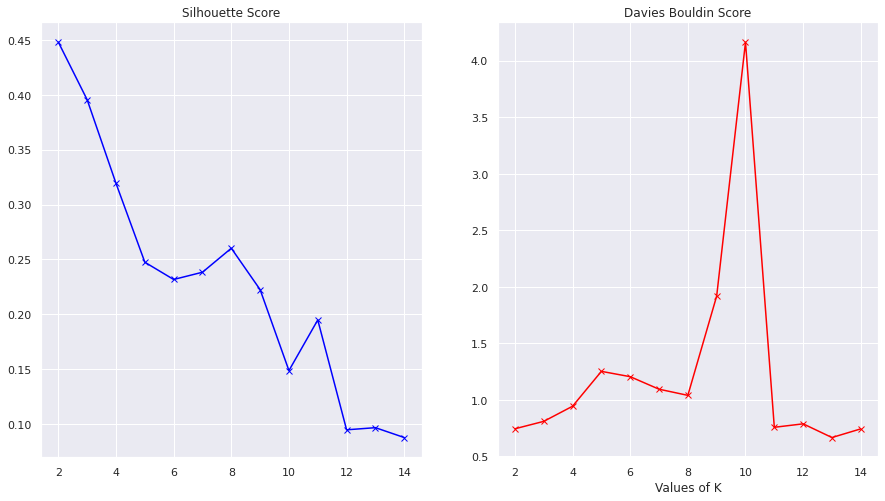

In [65]:
GridSearchForK(x_train,2,15,SpectralClustering)

## Result and Discussion

In [66]:
record

name  silihouette_score  davies_bouldin_score
0                 KMethoid           0.368147              0.883279
1                 KMeans++           0.370817              0.874783
2  Hierarchical Clustering           0.354730              0.902888
3                   DBSCAN           0.471174              2.528541
4      Spectral Clustering           0.448073              0.744779